In [1]:
from Experiment.metric.ConfusionMatrix import CFMatrix
import json
import matplotlib.pyplot as plt
import numpy as np

## 混淆矩阵作图

选了几个阶段作图看看

### 测试数据

发现acc可能有点问题，验证计算了一下

In [3]:
head = [2, 3, 4]
wd = [4, 5, 6]

In [3]:
file_path = r'E:\DATABASE\FirstGNN\220830_exp\kly\m7_2\flowrecorder.json'
with open(file_path, 'r', encoding='utf-8') as f:
    ret_dic = json.load(f)

In [7]:
ret_dic['1-th'].keys()

dict_keys(['ave_tr_loss', 'tr_loss', 'ave_tr_acc', 'tr_acc', 'ave_ts_loss', 'ave_ts_acc', 'ts_acc', 'logits', 'labels'])

In [54]:
b = 58
lg = ret_dic[f'{b}-th']['logits'][1:]
lb = ret_dic[f'{b}-th']['labels'][1:]

In [ ]:
from typing import List


lg2 = []

def lg_helper(l: List[float]):
    maxv, i = -100000, 0
    for id, v in enumerate(l):
        if v >= maxv:
            maxv = v
            i = id
    print(l, maxv, i)
    return maxv, i

for id, l in enumerate(lg):
    lg2.append(lg_helper(l))

In [23]:
len(lb), len(lg2)

(375, 375)

In [46]:
for j in range(len(lb)):
    lb[j] = int(lb[j][0])

In [29]:
acc = 0
dist1 = [0, 0, 0, 0, 0]
dist2 = [0, 0, 0, 0, 0]
for j in range(len(lg2)):
    # print(lb[j], lg2[j][1], lb[j] == lg2[j][1])
    if lg2[j][1] == lb[j]:
        acc += 1
        dist1[lb[j]] += 1
    dist2[lb[j]] += 1
acc/len(lg2), dist1, dist2

(0.8853333333333333, [35, 75, 76, 63, 83], [69, 75, 76, 70, 85])

In [47]:
cm = [[0 for _ in range(5)] for _ in range(5)]

for j in range(len(lg2)):
    cm[lg2[j][1]][lb[j]] += 1

cm

[[35, 0, 0, 3, 2],
 [2, 75, 0, 0, 0],
 [2, 0, 76, 1, 0],
 [26, 0, 0, 63, 0],
 [4, 0, 0, 3, 83]]

In [58]:
a = [47,58,86,152,176]
tmp = ret_dic[f'{a[1]}-th']
result = np.argmax(tmp['logits'][1:], axis=1)
c_m = np.zeros([5, 5])
labels = np.reshape(tmp['labels'][1:], -1)
cm = [[0 for _ in range(5)] for _ in range(5)]

for j in range(len(lg2)):
    cm[result[j]][int(labels[j])] += 1
cm

[[35, 0, 0, 3, 2],
 [2, 75, 0, 0, 0],
 [2, 0, 76, 1, 0],
 [26, 0, 0, 63, 0],
 [4, 0, 0, 3, 83]]

In [ ]:
for j in range(len(lg2)):
    print(result[j], lg2[j], tmp['logits'][j])

In [27]:
ret_dic['2-th']['ave_ts_acc']

0.6558424234390259

### 画图

In [19]:
ret_dic['58-th']['ave_ts_acc']

0.883152186870575

In [2]:
file_path = r'E:\DATABASE\FirstGNN\220909_wd_test\kly\m7_1\flowrecorder.json'
with open(file_path, 'r', encoding='utf-8') as f:
    ret_dic = json.load(f)

In [5]:
a

[150, 158, 139, 159, 103]

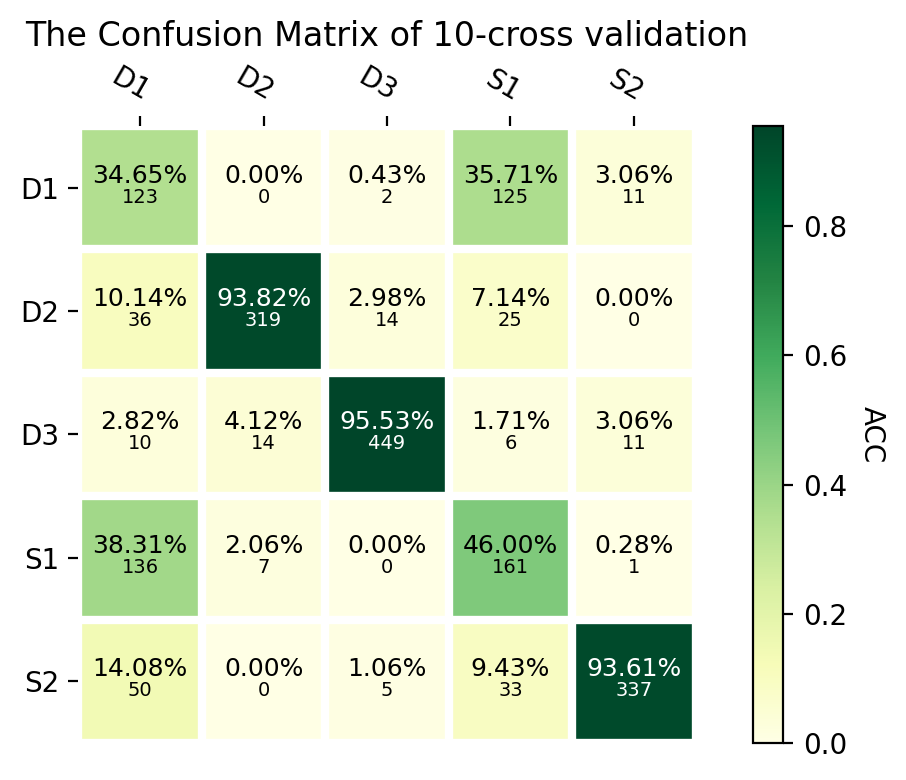

In [4]:
import random
a = [random.randint(100, 160) for _ in range(5)]
fig, ax = plt.subplots(dpi=200)
log = []
lb = []
for v in a:
    log.extend(ret_dic[f'{v}-th']['logits'][1:])
    lb.extend(ret_dic[f'{v}-th']['labels'][1:])
CFMatrix(log, lb, fig, ax)